In [1]:
### test analysis module
import pydrodelta.analysis 
import json
import matplotlib.pyplot as plt


In [2]:
#### load configuration
bordes_config = json.load(open("pydrodelta_config/sfer_marea_adjust.json"))
#### validate configuration
import jsonschema
schema = open("schemas/topology.json")
schema = json.load(schema)
try:
    jsonschema.validate(instance=bordes_config,schema=schema)
except jsonschema.exceptions.ValidationError as err:
    print(err)
print("Given JSON data is Valid")
#### instantiate boundarySet class from config file (.xml)
topology = pydrodelta.analysis.Topology(bordes_config)
topology


Given JSON data is Valid


In [3]:
#### load data
topology.loadData()
### sanitize timeseries
topology.removeOutliers()
topology.detectJumps()


False

In [ ]:
# serie_curu = topology.boundaries[1].series[3]
# serie_curu.moving_average
# serie_curu.applyMovingAverage()
# serie_curu.obs_df

In [4]:
topology.regularize()
topology.applyMovingAverage()
topology.applyOffset()


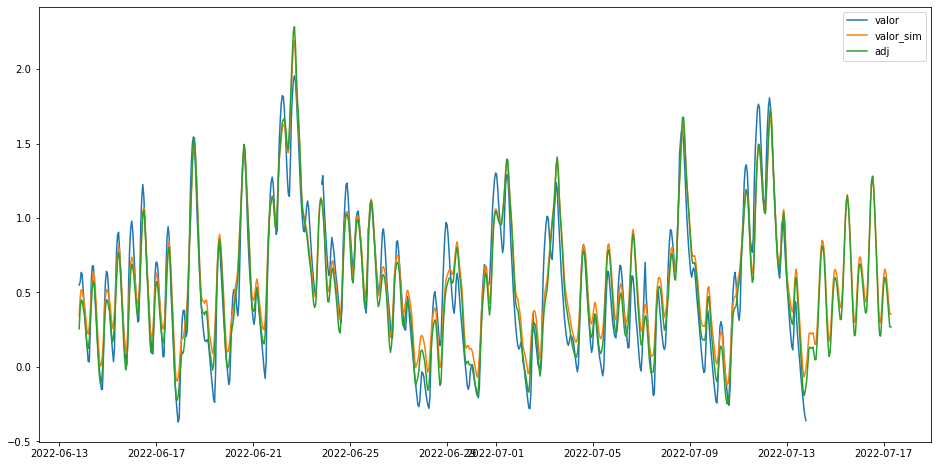

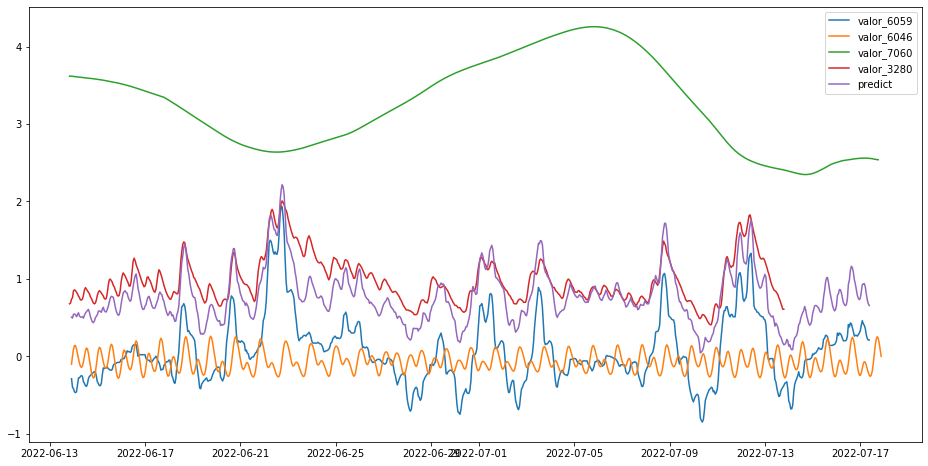

In [5]:
#### adjust
topology.adjust()

In [6]:
p = topology.nodes[1].pivotData()
p

,valor_6059,valor_6046,valor_7060,valor_3280
2022-06-13 17:00:00-03:00,NaN,NaN,3.6200,0.6775
2022-06-13 18:00:00-03:00,NaN,NaN,3.6200,0.6875
2022-06-13 19:00:00-03:00,-0.29,-0.103,3.6200,0.7375
2022-06-13 20:00:00-03:00,-0.40,0.002,3.6175,0.7575
2022-06-13 21:00:00-03:00,-0.42,0.091,3.6160,0.8475
...,...,...,...,...
2022-07-17 14:00:00-03:00,NaN,0.253,2.5400,NaN
2022-07-17 15:00:00-03:00,NaN,0.233,2.5400,NaN
2022-07-17 16:00:00-03:00,NaN,0.173,NaN,NaN
2022-07-17 17:00:00-03:00,NaN,0.091,NaN,NaN


In [7]:
node = topology.nodes[1]

In [14]:
#isinstance(node,pydrodelta.analysis.ObservedNode)
node.loadData(topology.timestart,topology.timeend)

In [8]:
node.data

,valor
timestart,
2022-06-13 17:00:00-03:00,NaN
2022-06-13 18:00:00-03:00,NaN
2022-06-13 19:00:00-03:00,0.505517
2022-06-13 20:00:00-03:00,0.493326
2022-06-13 21:00:00-03:00,0.542518
...,...
2022-07-16 23:00:00-03:00,0.925370
2022-07-17 00:00:00-03:00,0.934296
2022-07-17 01:00:00-03:00,0.938721


In [9]:
topology.nodes[1].saveSeries("tmp/npal.csv",pivot=True)

In [5]:
topology.saveData("tmp/sferMarea.csv",pivot=True)

In [6]:
borde = topology.boundaries[0]
borde.saveSeries(output="tmp/sferMarea.csv",pivot=True)


In [7]:
s = topology.boundaries[0].series[0]

In [6]:
s.obs_df

NameError: name 's' is not defined

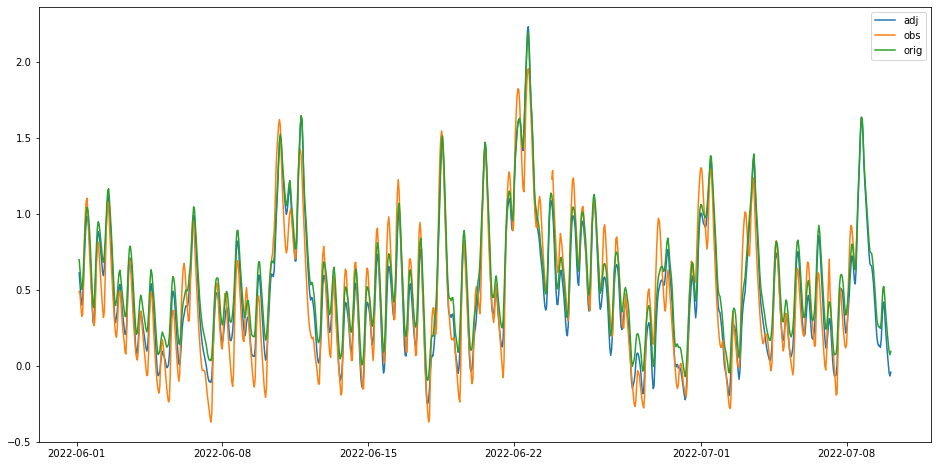

In [17]:
df = topology.boundaries[0].pivotData()
df =df.join(topology.boundaries[0].series[0].original_df,how="left",rsuffix="_original")
plt.figure(figsize=(16,8))
plt.plot(df)
plt.legend(["adj","obs","orig"])


In [9]:
topology.boundaries[0].series[0].original_df

,valor
timestart,
2022-06-01 00:00:00-03:00,0.698319
2022-06-01 01:00:00-03:00,0.624174
2022-06-01 02:00:00-03:00,0.556064
2022-06-01 03:00:00-03:00,0.503473
2022-06-01 04:00:00-03:00,0.528476
...,...
2022-07-09 20:00:00-03:00,0.212929
2022-07-09 21:00:00-03:00,0.152579
2022-07-09 22:00:00-03:00,0.093953
